# Recomendador de anime
[Aqui](https://github.com/marlesson/scrapy_myanimelist) esta el scrapper

In [1]:
import fastai.collab as fc
import fastai.tabular.all as ft

import pandas as pd
from numpy import NaN

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
torch.cuda.is_available()

True

In [3]:
animes = pd.read_csv("dataset_anime/animes.csv"); animes

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,"Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead. \r\n \r\nWhen they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to d...","['Comedy', 'Sports', 'Drama', 'School', 'Shounen']","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/76662.jpg,https://myanimelist.net/anime/28891/Haikyuu_Second_Season
1,23273,Shigatsu wa Kimi no Uso,"Music accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. \r\n \r\nTwo years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. \r\n \r\nBased on the manga serie...","['Drama', 'Music', 'Romance', 'School', 'Shounen']","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/67177.jpg,https://myanimelist.net/anime/23273/Shigatsu_wa_Kimi_no_Uso
2,34599,Made in Abyss,"The Abyss—a gaping chasm stretching down into the depths of the earth, filled with mysterious creatures and relics from a time long past. How did it come to be? What lies at the bottom? Countless brave individuals, known as Divers, have sought to solve these mysteries of the Abyss, fearlessly descending into its darkest realms. The best and bravest of the Divers, the White Whistles, are hailed as legends by those who remain on the surface. \r\n \r\nRiko, daughter of the missing White Whistle Lyza the Annihilator, aspires to become like her mother and explore the furthest reaches of the Aby...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/86733.jpg,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, something of equal value must be lost."" \r\n \r\nAlchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their orig...","['Action', 'Military', 'Adventure', 'Comedy', 'Drama', 'Magic', 'Fantasy', 'Shounen']","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/96541.jpg,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood
4,31758,Kizumonogatari III: Reiketsu-hen,"After helping revive the legendary vampire Kiss-shot Acerola-orion Heart-under-blade, Koyomi Araragi has become a vampire himself and her servant. Kiss-shot is certain she can turn him back into a human, but only once regaining her full power. \r\n \r\nAraragi has hunted down the three vampire hunters that defeated Kiss-shot and retrieved her limbs to return her to full strength. However, now that Araragi has alm

In [4]:
animes.rename(columns={"uid": "anime_uid"}, inplace=True); animes

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,"Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead. \r\n \r\nWhen they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to d...","['Comedy', 'Sports', 'Drama', 'School', 'Shounen']","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/76662.jpg,https://myanimelist.net/anime/28891/Haikyuu_Second_Season
1,23273,Shigatsu wa Kimi no Uso,"Music accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. \r\n \r\nTwo years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. \r\n \r\nBased on the manga serie...","['Drama', 'Music', 'Romance', 'School', 'Shounen']","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/67177.jpg,https://myanimelist.net/anime/23273/Shigatsu_wa_Kimi_no_Uso
2,34599,Made in Abyss,"The Abyss—a gaping chasm stretching down into the depths of the earth, filled with mysterious creatures and relics from a time long past. How did it come to be? What lies at the bottom? Countless brave individuals, known as Divers, have sought to solve these mysteries of the Abyss, fearlessly descending into its darkest realms. The best and bravest of the Divers, the White Whistles, are hailed as legends by those who remain on the surface. \r\n \r\nRiko, daughter of the missing White Whistle Lyza the Annihilator, aspires to become like her mother and explore the furthest reaches of the Aby...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/86733.jpg,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, something of equal value must be lost."" \r\n \r\nAlchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their orig...","['Action', 'Military', 'Adventure', 'Comedy', 'Drama', 'Magic', 'Fantasy', 'Shounen']","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/96541.jpg,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood
4,31758,Kizumonogatari III: Reiketsu-hen,"After helping revive the legendary vampire Kiss-shot Acerola-orion Heart-under-blade, Koyomi Araragi has become a vampire himself and her servant. Kiss-shot is certain she can turn him back into a human, but only once regaining her full power. \r\n \r\nAraragi has hunted down the three vampire hunters that defeated Kiss-shot and retrieved her limbs to return her to full strength. However, now that Araragi h

In [5]:
users = pd.read_csv("dataset_anime/profiles.csv"); users

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '9253', '34599', '3588', '13601', '6956']",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382', '849', '235', '35180', '31646']",https://myanimelist.net/profile/aManOfCulture99
...,...,...,...,...,...
81722,lovelessxd,Female,"Aug 6, 1992","['853', '5114']",https://myanimelist.net/profile/lovelessxd
81723,Shattered_Angel,Female,"Sep 6, 1994","['150', '27', '1520', '121', '31452', '32995', '877', '14713', '129', '11111']",https://myanimelist.net/profile/Shattered_Angel
81724,FluffyWalrus,Male,NaN,"['121', '43', '237', '202', '205']",https://myanimelist.net/profile/FluffyWalrus
81725,camco,Female,Sep 23,"['199', '4224', '7054', '13601', '14713']",https://myanimelist.net/profile/camco


In [6]:
ratings = pd.read_csv("dataset_anime/reviews.csv");ratings

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 10 \n \n \n Animation \n 10 \n \n \n Sound \n 10 \n \n \n Character \n 10 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Let me start...,10,"{'Overall': '10', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 7 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 8 \n \n \n Character \n 8 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n Art 9/10: It is gr...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9', 'Sound': '8', 'Character': '8', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 9 \n \n \n Animation \n 9 \n \n \n Sound \n 10 \n \n \n Character \n 10 \n \n \n Enjoyment \n 9 \n \n \n \n\n \n Story \r\n \r\nt...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9', 'Sound': '10', 'Character': '10', 'Enjoyment': '9'}",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 10 \n \n \n Animation \n 8 \n \n \n Sound \n 9 \n \n \n Character \n 10 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Kyoto Animatio...,10,"{'Overall': '10', 'Story': '10', 'Animation': '8', 'Sound': '9', 'Character': '10', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=291149
...,...,...,...,...,...,...,...
192107,240067,Unicorn819,1281,"\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 5 \n \n \n Animation \n 10 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 9 \n \n \n \n\n \n Ok, this anime i...",9,"{'Overall': '9', 'Story': '5', 'Animation': '10', 'Sound': '10', 'Character': '9', 'Enjoyment': '9'}",https://myanimelist.net/reviews.php?id=240067
192108,285777,ShizzoSVH,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 9 \n \n \n Character \n 9 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n The dub for this ...,9,"{'Overall': '9', 'Story': '7', 'Animation': '9', 'Sound': '9', 'Character': '9', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=285777
192109,286904,AlluMan96,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 3 \n \n \n Story \n 3 \n \n \n Animation \n 1 \n \n \n Sound \n 2 \n \n \n Character \n 2 \n \n \n Enjoyment \n 5 \n \n \n \n\n \n Some might argue t...,3,"{'Overall': '3', 'Story': '3', 'Animation': '1', 'Sound': '2', 'Character': '2', 'Enjoyment': '5'}",https://myanimelist.net/reviews.php?id=286904
192110,287903,AgentK300,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 3 \n \n \n Animation \n 3 \n \n \n Sound \n 3 \n \n \n Character \n 3 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Absolutely hilar...,10,"{'Overall': '10', 'Story': '3', 'Animation': '3', 'Sound': '3', 'Character': '3', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=287903


In [7]:
animes.columns

Index(['anime_uid', 'title', 'synopsis', 'genre', 'aired', 'episodes',
       'members', 'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

In [8]:
users.columns

Index(['profile', 'gender', 'birthday', 'favorites_anime', 'link'], dtype='object')

In [9]:
def flat_l1(yp, y):
    return F.l1_loss(yp.view(-1), y.view(-1))

# Primero solo los ratings

In [10]:
ratings.columns

Index(['uid', 'profile', 'anime_uid', 'text', 'score', 'scores', 'link'], dtype='object')

In [11]:
ratings = ratings[['uid', 'anime_uid', 'profile','score']]

In [12]:
ratings.head()

,uid,anime_uid,profile,score
0,255938,34096,DesolatePsyche,8
1,259117,34599,baekbeans,10
2,253664,28891,skrn,7
3,8254,2904,edgewalker00,9
4,291149,4181,aManOfCulture99,10


In [13]:
dls = fc.CollabDataLoaders.from_df(ratings, user_name = 'uid', item_name ='anime_uid', rating_name  = 'score', bs = 128)

In [14]:
dls.show_batch()

,uid,anime_uid,score
0,29370,6213,7
1,222023,31798,7
2,203546,223,10
3,316691,18153,9
4,220470,12611,5
5,115885,17651,7
6,197420,19815,10
7,79992,1154,6
8,192454,12531,9
9,308489,7785,7


In [15]:
learn = fc.collab_learner(dls, opt_func = fc.ranger, metrics = flat_l1)

In [16]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(114055, 50)
  (i_weight): Embedding(7708, 50)
  (u_bias): Embedding(114055, 1)
  (i_bias): Embedding(7708, 1)
)

u_weight es de usuarios
i_weights es de los animes

admeas de ponerle los pesos, le ponemos un vector aditivo, es como un bias

In [17]:
learn.summary()

In [18]:
learn.model??

Signature:      learn.model(n_factors, n_users, n_items, y_range=None)
Call signature: learn.model(*input, **kwargs)
Type:           EmbeddingDotBias
String form:   
EmbeddingDotBias(
  (u_weight): Embedding(114055, 50)
  (i_weight): Embedding(7708, 50)
  (u_bias): Embedding(114055, 1)
  (i_bias): Embedding(7708, 1)
)
File:           ~/anaconda3/envs/neuralnetworks/lib/python3.8/site-packages/fastai/collab.py
Source:        
class EmbeddingDotBias(Module):
    "Base dot model for collaborative filtering."
    def __init__(self, n_factors, n_users, n_items, y_range=None):
        self.y_range = y_range
        (self.u_weight, self.i_weight, self.u_bias, self.i_bias) = [Embedding(*o) for o in [
            (n_users, n_factors), (n_items, n_factors), (n_users,1), (n_items,1)
        ]]

    def forward(self, x):
        users,items = x[:,0],x[:,1]
        dot = self.u_weight(users)* self.i_weight(items)
        res = dot.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze()

SuggestedLRs(lr_min=0.2754228591918945, lr_steep=9.12010818865383e-07)

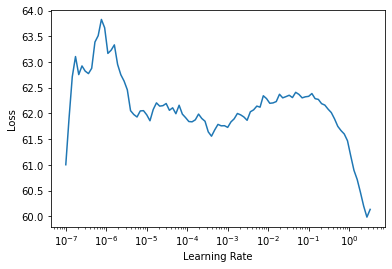

In [19]:
learn.lr_find()

In [20]:
learn.fit_one_cycle(20, 3e-2, div = 1, pct_start = 0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,16.776033,16.155415,3.186563,00:10
1,7.056326,11.963083,2.619442,00:10
2,3.339665,11.435281,2.557032,00:10
3,2.951342,10.688008,2.443374,00:09
4,2.645083,10.180720,2.344252,00:10
5,2.428032,9.997473,2.300320,00:09
6,2.391404,9.849742,2.284017,00:10
7,2.388206,9.690369,2.251651,00:10
8,2.241664,9.611350,2.239949,00:10
9,2.275399,9.608144,2.239198,00:09


In [19]:
learn = fc.collab_learner(dls, opt_func = fc.ranger, metrics = flat_l1, n_factors=32)

In [20]:
learn.fit_one_cycle(20, 1e-3, div = 1, pct_start = 0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,60.118603,59.551567,7.386089,00:08
1,56.337574,56.315826,7.171546,00:08
2,51.359955,52.689575,6.921361,00:08
3,45.827015,48.795052,6.638382,00:08
4,40.023453,44.786755,6.326439,00:09
5,34.364452,40.804043,5.989550,00:08
6,28.625652,37.000565,5.635232,00:08
7,23.663868,33.562626,5.279467,00:08
8,20.223537,30.642824,4.945963,00:08
9,17.445906,28.225409,4.640947,00:08


## Y si lo hacemos una red neuronal

In [21]:
learn = fc.collab_learner(dls, opt_func=fc.ranger, use_nn = True, emb_szs={'uid':32, 'anime_uid':32},metrics = flat_l1)

In [22]:
learn.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(114172, 32)
    (1): Embedding(7687, 32)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=64, out_features=50, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=50, out_features=1, bias=True)
    )
  )
)

In [23]:
learn.summary()

EmbeddingNN (Input shape: 128)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 32            
Embedding                                 3653504    True      
Embedding                                 245984     True      
Dropout                                                        
BatchNorm1d                               128        True      
____________________________________________________________________________
                     128 x 50            
Linear                                    3200       True      
ReLU                                                           
____________________________________________________________________________
                     128 x 1             
Linear                                    51         True      
____________________________________________________________________________

Total params: 3,902,867
Total trainable params: 3,902,867
Total non-trainable params: 0

Optimizer 

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0691830962896347)

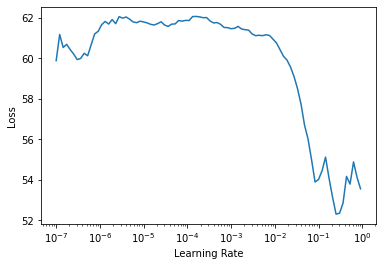

In [24]:
learn.lr_find()

In [25]:
learn.fit_one_cycle(20, 3e-2, div = 1, pct_start = 0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,3.238469,3.172961,1.340383,00:10
1,1.434491,2.727200,1.195309,00:10
2,0.867509,2.605925,1.141615,00:10
3,0.655258,2.514085,1.119770,00:10
4,0.495680,2.492915,1.074820,00:10
5,0.458266,2.474157,1.062191,00:10
6,0.441996,2.467049,1.057952,00:10
7,0.445343,2.504066,1.043171,00:10
8,0.473125,2.487509,1.041283,00:10
9,0.509627,2.481865,1.052966,00:10


In [26]:
learn = fc.collab_learner(dls, opt_func=fc.ranger, use_nn = True, emb_szs={'uid':32, 'anime_uid':32}, layers = [1024,512,256,128], metrics = flat_l1)

In [27]:
learn.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(114172, 32)
    (1): Embedding(7687, 32)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=64, out_features=1024, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1024, out_features=512, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=512, out_features=256, bias=False)
      (2): ReLU(inplace=True)
    )
    (3): LinBnDrop(
      (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.04786301031708717)

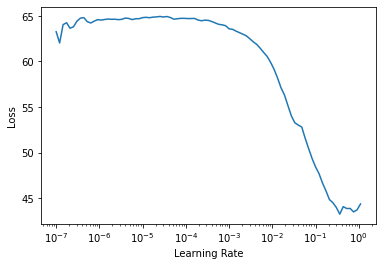

In [28]:
learn.lr_find()

In [29]:
learn.fit_one_cycle(20, 3e-2, div = 1, pct_start = 0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,3.541837,3.311335,1.341849,00:15
1,1.648055,2.723550,1.163882,00:15
2,0.764623,2.553184,1.065266,00:16
3,0.522033,2.807789,1.109651,00:15
4,0.507833,2.855092,1.047251,00:14
5,0.560250,3.038119,1.083607,00:15
6,0.709673,2.838946,1.073155,00:16
7,0.787319,3.197826,1.147190,00:15
8,0.719238,3.256322,1.111259,00:16
9,0.762968,2.822282,1.036275,00:16


## Vamos a hacer las cosas pal tabular pandas, vamos a primero poner las columnas de los ratings


In [9]:
animes['genre'].values

array(["['Comedy', 'Sports', 'Drama', 'School', 'Shounen']",
       "['Drama', 'Music', 'Romance', 'School', 'Shounen']",
       "['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']", ...,
       "['Mystery', 'Horror', 'Supernatural']",
       "['Action', 'Adventure', 'Comedy', 'Historical', 'Demons', 'Supernatural', 'Drama', 'Magic', 'Romance', 'Fantasy', 'Shounen']",
       "['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']"], dtype=object)

In [10]:
for _ in animes.genre.unique()[0].lstrip('[').rstrip(']').split(','):
    _ = _.strip()


In [11]:
"School" in animes.genre.unique()[0]

True

In [12]:
animes[animes['genre'] == '']

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link


In [13]:
#primero vamos a sacar los generos
genres = []
for genre_list in animes.genre.values:
    genre_list = genre_list.lstrip('[').rstrip(']').split(',')
    for genre in genre_list:
        genre = genre.strip()
        if genre not in genres:
            genres.append(genre)

In [14]:
for i in range(len(genres)):
    genres[i] = genres[i].strip("'")
    

In [15]:
genres

['Comedy',
 'Sports',
 'Drama',
 'School',
 'Shounen',
 'Music',
 'Romance',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Fantasy',
 'Action',
 'Military',
 'Magic',
 'Supernatural',
 'Vampire',
 'Slice of Life',
 'Demons',
 'Historical',
 'Super Power',
 'Mecha',
 'Parody',
 'Samurai',
 'Seinen',
 'Police',
 'Psychological',
 'Josei',
 'Space',
 'Kids',
 'Shoujo Ai',
 'Ecchi',
 'Shoujo',
 'Horror',
 'Shounen Ai',
 'Cars',
 'Martial Arts',
 'Game',
 'Thriller',
 'Dementia',
 'Harem',
 '',
 'Hentai',
 'Yaoi',
 'Yuri']

In [16]:
'Romance' in animes.iloc[1]['genre']

True

## Vamos a ponerle los boleanos a los animes

In [17]:
for genre in genres:
    genre_list = []
    for genres in animes.genre.values:
        value = genre in genres
        genre_list.append(value)
    animes[genre] = genre_list     

In [18]:
animes.drop(columns=[''], inplace=True)

In [19]:
animes

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,Shounen Ai,Cars,Martial Arts,Game,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri
0,28891,Haikyuu!! Second Season,"Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead. \r\n \r\nWhen they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to d...","['Comedy', 'Sports', 'Drama', 'School', 'Shounen']","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,False,False,False,False,False,False,False,False,False,False
1,23273,Shigatsu wa Kimi no Uso,"Music accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. \r\n \r\nTwo years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. \r\n \r\nBased on the manga serie...","['Drama', 'Music', 'Romance', 'School', 'Shounen']","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,False,False,False,False,False,False,False,False,False,False
2,34599,Made in Abyss,"The Abyss—a gaping chasm stretching down into the depths of the earth, filled with mysterious creatures and relics from a time long past. How did it come to be? What lies at the bottom? Countless brave individuals, known as Divers, have sought to solve these mysteries of the Abyss, fearlessly descending into its darkest realms. The best and bravest of the Divers, the White Whistles, are hailed as legends by those who remain on the surface. \r\n \r\nRiko, daughter of the missing White Whistle Lyza the Annihilator, aspires to become like her mother and explore the furthest reaches of the Aby...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,...,False,False,False,False,False,False,False,False,False,False
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, something of equal value must be lost."" \r\n \r\nAlchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their orig...","['Action', 'Military', 'Adventure', 'Comedy', 'Drama', 'Magic', 'Fantasy', 'Shounen']","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,...,False,False,False,False,False,False,False,False,False,False
4,31758,Kizumonogatari III: Reiketsu-hen,"After helping revive the legendary vampire Kiss-shot Acerola-orion Heart-under-blade, Koyomi Araragi has become a vampire himself and her servant. Kiss-shot is certain she can turn him back into a human, but only once regaining her full power. \r\n \r\nAraragi has hunted down the three vampire hunters that defeated Kiss-shot and retrieved her limbs to return her to full strength. However, now that Araragi has almost accomplished what he’s been fighting for this whole time, he has to consider if this is what he really wants. Once he r

In [20]:
animes['Romance'].unique()

array([False,  True])

In [21]:
animes[animes['genre'].apply(lambda x : 'Romance' in x)]

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,Shounen Ai,Cars,Martial Arts,Game,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri
1,23273,Shigatsu wa Kimi no Uso,"Music accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. \r\n \r\nTwo years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. \r\n \r\nBased on the manga serie...","['Drama', 'Music', 'Romance', 'School', 'Shounen']","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,False,False,False,False,False,False,False,False,False,False
14,4181,Clannad: After Story,"Clannad: After Story , the sequel to the critically acclaimed slice-of-life series Clannad , begins after Tomoya Okazaki and Nagisa Furukawa graduate from high school. Together, they experience the emotional rollercoaster of growing up. Unable to decide on a course for his future, Tomoya learns the value of a strong work ethic and discovers the strength of Nagisa's support. Through the couple's dedication and unity of purpose, they push forward to confront their personal problems, deepen their old relationships, and create new bonds. \r\n \r\nTime also moves on in the Illusionary World. A...","['Slice of Life', 'Comedy', 'Supernatural', 'Drama', 'Romance']","Oct 3, 2008 to Mar 27, 2009",24.0,740101,64,12.0,8.97,...,False,False,False,False,False,False,False,False,False,False
19,8038,Nodame Cantabile: Finale - Mine to Kiyora no Saikai,"Violinist Kiyora Miki meets with Shinichi Chiaki, Megumi ""Nodame"" Noda, and their two friends to visit world-class conductor Franz von Stresemann; upon arriving at his residence in Vienna, they discover that the maestro has escaped to Japan. As they make the most of their wasted trip by visiting important landmarks in the historical capital of classical music, Kiyora has a confession to make: she has not seen her boyfriend Ryuutarou Mine for an entire year and is still busy preparing for an international competition in Paris. Chiaki and Nodame promise to attend the final round, but when th...","['Comedy', 'Josei', 'Music', 'Romance']","Apr 7, 2010",1.0,33038,2428,750.0,7.88,...,False,False,False,False,False,False,False,False,False,False
28,451,InuYasha Movie 3: Tenka Hadou no Ken,"Izayoi and Inu no Taishou, Inuyasha's parents, are having problems with a human named Setsuna no Takemaru. Sou'unga a magical sword that has been sealed away for 700 years is found. Now everyone is after the sword and its powers but it seems the sword has something else in mind. \r\n \r\n(Source: ANN) \r\n","['Action', 'Adventure', 'Comedy', 'Historical', 'Demons', 'Supernatural', 'Drama', 'Magic', 'Romance', 'Fantasy', 'Shounen']","Dec 20, 2003",1.0,68407,1527,791.0,7.86,...,False,False,False,False,False,False,False,False,False,False
33,27633,Gekkan Shoujo Nozaki-kun Specials,Specials bundled with the Blu-ray/DVDs.,"['Comedy', 'Romance', 'School']","Sep 24, 2014 to Feb 25, 2015",6.0,87789,1233,786.0,7.86,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19299,1211,Macross Plus Movie Edition,"A.D. 2040—Thirty years have passed since the battle between the Earth and Zentraedi forces changed the lives of both races. On planet Eden, a top-secret project known as ""Supernova"" is being held to determine U.N. Spacy's next-generation variable fighter. Competing to win the funding are Shinsei Industries' YF-19 and General Galaxy's YF-21. Piloting the YF-21 is Guld Goa Bowman, a half-human, half-Zentraedi. Shinsei receives its new test pilot in the for

In [22]:
animes.columns

Index(['anime_uid', 'title', 'synopsis', 'genre', 'aired', 'episodes',
       'members', 'popularity', 'ranked', 'score', 'img_url', 'link', 'Comedy',
       'Sports', 'Drama', 'School', 'Shounen', 'Music', 'Romance', 'Sci-Fi',
       'Adventure', 'Mystery', 'Fantasy', 'Action', 'Military', 'Magic',
       'Supernatural', 'Vampire', 'Slice of Life', 'Demons', 'Historical',
       'Super Power', 'Mecha', 'Parody', 'Samurai', 'Seinen', 'Police',
       'Psychological', 'Josei', 'Space', 'Kids', 'Shoujo Ai', 'Ecchi',
       'Shoujo', 'Horror', 'Shounen Ai', 'Cars', 'Martial Arts', 'Game',
       'Thriller', 'Dementia', 'Harem', 'Hentai', 'Yaoi', 'Yuri'],
      dtype='object')

In [23]:
ratings

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 10 \n \n \n Animation \n 10 \n \n \n Sound \n 10 \n \n \n Character \n 10 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Let me start...,10,"{'Overall': '10', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 7 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 8 \n \n \n Character \n 8 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n Art 9/10: It is gr...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9', 'Sound': '8', 'Character': '8', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 9 \n \n \n Animation \n 9 \n \n \n Sound \n 10 \n \n \n Character \n 10 \n \n \n Enjoyment \n 9 \n \n \n \n\n \n Story \r\n \r\nt...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9', 'Sound': '10', 'Character': '10', 'Enjoyment': '9'}",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 10 \n \n \n Animation \n 8 \n \n \n Sound \n 9 \n \n \n Character \n 10 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Kyoto Animatio...,10,"{'Overall': '10', 'Story': '10', 'Animation': '8', 'Sound': '9', 'Character': '10', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=291149
...,...,...,...,...,...,...,...
192107,240067,Unicorn819,1281,"\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 5 \n \n \n Animation \n 10 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 9 \n \n \n \n\n \n Ok, this anime i...",9,"{'Overall': '9', 'Story': '5', 'Animation': '10', 'Sound': '10', 'Character': '9', 'Enjoyment': '9'}",https://myanimelist.net/reviews.php?id=240067
192108,285777,ShizzoSVH,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 9 \n \n \n Character \n 9 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n The dub for this ...,9,"{'Overall': '9', 'Story': '7', 'Animation': '9', 'Sound': '9', 'Character': '9', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=285777
192109,286904,AlluMan96,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 3 \n \n \n Story \n 3 \n \n \n Animation \n 1 \n \n \n Sound \n 2 \n \n \n Character \n 2 \n \n \n Enjoyment \n 5 \n \n \n \n\n \n Some might argue t...,3,"{'Overall': '3', 'Story': '3', 'Animation': '1', 'Sound': '2', 'Character': '2', 'Enjoyment': '5'}",https://myanimelist.net/reviews.php?id=286904
192110,287903,AgentK300,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 3 \n \n \n Animation \n 3 \n \n \n Sound \n 3 \n \n \n Character \n 3 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Absolutely hilar...,10,"{'Overall': '10', 'Story': '3', 'Animation': '3', 'Sound': '3', 'Character': '3', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=287903


In [24]:
ratings_join = ratings.copy()

In [25]:
new_ratings = ratings_join.join(animes.set_index('anime_uid'), on='anime_uid', lsuffix='_anime')

In [26]:
new_ratings

,uid,profile,anime_uid,text,score_anime,scores,link_anime,title,synopsis,genre,...,Shounen Ai,Cars,Martial Arts,Game,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,"After joining the resistance against the bakufu, Gintoki and the gang are in hiding, along with Katsura and his Joui rebels. The Yorozuya is soon approached by Nobume Imai and two members of the Kiheitai, who explain that the Harusame pirates have turned against 7th Division Captain Kamui and their former ally Takasugi. The Kiheitai present Gintoki with a job: find Takasugi, who has been missing since his ship was ambushed in a Harusame raid. Nobume also makes a stunning revelation regarding the Tendoushuu, a secret organization pulling the strings of numerous factions, and their leader Ut...","['Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Shounen']",...,False,False,False,False,False,False,False,False,False,False
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,"After joining the resistance against the bakufu, Gintoki and the gang are in hiding, along with Katsura and his Joui rebels. The Yorozuya is soon approached by Nobume Imai and two members of the Kiheitai, who explain that the Harusame pirates have turned against 7th Division Captain Kamui and their former ally Takasugi. The Kiheitai present Gintoki with a job: find Takasugi, who has been missing since his ship was ambushed in a Harusame raid. Nobume also makes a stunning revelation regarding the Tendoushuu, a secret organization pulling the strings of numerous factions, and their leader Ut...","['Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Shounen']",...,False,False,False,False,False,False,False,False,False,False
1,259117,baekbeans,34599,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 10 \n \n \n Animation \n 10 \n \n \n Sound \n 10 \n \n \n Character \n 10 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Let me start...,10,"{'Overall': '10', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=259117,Made in Abyss,"The Abyss—a gaping chasm stretching down into the depths of the earth, filled with mysterious creatures and relics from a time long past. How did it come to be? What lies at the bottom? Countless brave individuals, known as Divers, have sought to solve these mysteries of the Abyss, fearlessly descending into its darkest realms. The best and bravest of the Divers, the White Whistles, are hailed as legends by those who remain on the surface. \r\n \r\nRiko, daughter of the missing White Whistle Lyza the Annihilator, aspires to become like her mother and explore the furthest reaches of the Aby...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']",...,False,False,False,False,False,False,False,False,False,False
1,259117,baekbeans,34599,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 10 \n \n \n Animation \n 10 \n \n \n Sound \n 10 \n \n \n Character \n 10 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Let me start...,10,"{'Overall': '10', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=259117,Made in Aby

In [27]:
# new_ratings.drop_duplicates(inplace=True)

In [28]:
new_ratings.isna().sum()

uid            0
profile        0
anime_uid      0
text           0
score_anime    0
              ..
Dementia       0
Harem          0
Hentai         0
Yaoi           0
Yuri           0
Length: 61, dtype: int64

In [29]:
new_ratings.columns

Index(['uid', 'profile', 'anime_uid', 'text', 'score_anime', 'scores',
       'link_anime', 'title', 'synopsis', 'genre', 'aired', 'episodes',
       'members', 'popularity', 'ranked', 'score', 'img_url', 'link', 'Comedy',
       'Sports', 'Drama', 'School', 'Shounen', 'Music', 'Romance', 'Sci-Fi',
       'Adventure', 'Mystery', 'Fantasy', 'Action', 'Military', 'Magic',
       'Supernatural', 'Vampire', 'Slice of Life', 'Demons', 'Historical',
       'Super Power', 'Mecha', 'Parody', 'Samurai', 'Seinen', 'Police',
       'Psychological', 'Josei', 'Space', 'Kids', 'Shoujo Ai', 'Ecchi',
       'Shoujo', 'Horror', 'Shounen Ai', 'Cars', 'Martial Arts', 'Game',
       'Thriller', 'Dementia', 'Harem', 'Hentai', 'Yaoi', 'Yuri'],
      dtype='object')

## Primer Modelo ya con join

In [30]:
cat_names = ['uid','anime_uid','popularity', 'ranked', 'Comedy', 'Sports', 'Drama', 'School', 'Shounen',
       'Music', 'Romance', 'Sci-Fi', 'Adventure', 'Mystery', 'Fantasy',
       'Action', 'Military', 'Magic', 'Supernatural', 'Vampire',
       'Slice of Life', 'Demons', 'Historical', 'Super Power', 'Mecha',
       'Parody', 'Samurai', 'Seinen', 'Police', 'Psychological', 'Josei',
       'Space', 'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror', 'Shounen Ai',
       'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia', 'Harem',
       'Hentai', 'Yaoi', 'Yuri']
y_name = ['score_anime']

In [31]:
X = fc.range_of(new_ratings)
valid_cut = len(new_ratings)//4

In [32]:
stc = fc.TabularCollab(new_ratings, procs=[ft.Categorify,ft.FillMissing],
                      cat_names = cat_names, y_names = y_name,
                      splits = (X[:3*valid_cut], X[3*valid_cut:]))

In [33]:
dls = stc.dataloaders(bs=1024)

In [34]:
learn = fc.collab_learner (dls, opt_func=fc.ranger, use_nn = True, layers = [1024,512,256,128,64], metrics = flat_l1)

In [35]:
learn.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(113645, 600)
    (1): Embedding(6839, 225)
    (2): Embedding(6373, 216)
    (3): Embedding(5849, 206)
    (4): Embedding(3, 3)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
    (21): Embedding(3, 3)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
    (24): Embedding(3, 3)
    (25): Embedding(3, 3)
    (26): Embedding(3, 3)
    (27): Embedding(3, 3)
    (28): Embedding(3, 3)
    (29): Embedding(3, 3)
    (30): Embedding(3, 3)
    (31): Embedding(3, 3)
    (32): Embedding(3, 3)
    (33): Embedding(3, 3)
    (34): Embedding(3, 3)
    (35): Embedding(3, 3)
    (36): Embed

In [36]:
learn.summary()

EmbeddingNN (Input shape: 1024)
Layer (type)         Output Shape         Param #    Trainable 
                     1024 x 600          
Embedding                                 68187000   True      
____________________________________________________________________________
                     1024 x 225          
Embedding                                 1538775    True      
____________________________________________________________________________
                     1024 x 216          
Embedding                                 1376568    True      
____________________________________________________________________________
                     1024 x 206          
Embedding                                 1204894    True      
____________________________________________________________________________
                     1024 x 3            
Embedding                                 9          True      
Embedding                                 9          True      
Em

SuggestedLRs(lr_min=0.10964782238006592, lr_steep=0.02290867641568184)

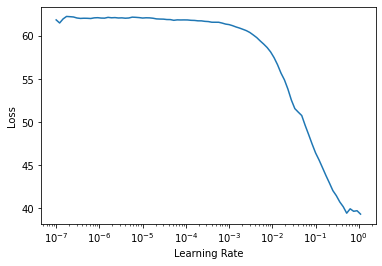

In [37]:
learn.lr_find()

In [38]:
learn.fit_one_cycle(20, 1e-2, pct_start = 0.7, div = 1)

epoch,train_loss,valid_loss,flat_l1,time
0,2.273772,1.965691,0.979462,00:13
1,0.729201,1.236696,0.652191,00:12
2,0.282414,1.148103,0.593972,00:12
3,0.166221,1.188283,0.538750,00:12
4,0.145416,2.014593,0.633602,00:12
5,0.147216,1.137928,0.524839,00:12
6,0.129402,1.422469,0.501204,00:12
7,0.132597,1.424190,0.599622,00:12
8,0.116472,1.345033,0.519742,00:12
9,0.122723,1.468087,0.539781,00:12


In [63]:
learn.fit_one_cycle(1, 1e-2, pct_start = 0.7, div = 1)

epoch,train_loss,valid_loss,flat_l1,time
0,2.283843,1.725073,0.888442,00:12


In [39]:
learn.show_results()

,uid,anime_uid,popularity,ranked,Comedy,Sports,Drama,School,Shounen,Music,Romance,Sci-Fi,Adventure,Mystery,Fantasy,Action,Military,Magic,Supernatural,Vampire,Slice of Life,Demons,Historical,Super Power,Mecha,Parody,Samurai,Seinen,Police,Psychological,Josei,Space,Kids,Shoujo Ai,Ecchi,Shoujo,Horror,Shounen Ai,Cars,Martial Arts,Game,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri,score_anime,score_anime_pred
0,103039,128,799,964,1,1,1,1,1,1,2,1,2,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,9,9.004748
1,91924,1821,3992,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,6,6.015396
2,112483,6652,172,51,1,1,1,1,2,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10.005490
3,68677,5545,696,1006,2,1,1,1,1,1,1,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,5.996983
4,76246,3315,7,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,9,9.015392
5,51711,4902,2300,917,1,1,1,1,2,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4.010153
6,101161,2550,4,1,2,1,2,1,2,1,1,1,2,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10.007057
7,6967,1032,1,51,1,1,1,1,2,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,8,8.035278
8,53175,4590,187,119,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,7,6.987131


## Ahora le agregamos la parte de usuarios

In [40]:
users.columns

Index(['profile', 'gender', 'birthday', 'favorites_anime', 'link'], dtype='object')

In [41]:
users

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '9253', '34599', '3588', '13601', '6956']",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382', '849', '235', '35180', '31646']",https://myanimelist.net/profile/aManOfCulture99
...,...,...,...,...,...
81722,lovelessxd,Female,"Aug 6, 1992","['853', '5114']",https://myanimelist.net/profile/lovelessxd
81723,Shattered_Angel,Female,"Sep 6, 1994","['150', '27', '1520', '121', '31452', '32995', '877', '14713', '129', '11111']",https://myanimelist.net/profile/Shattered_Angel
81724,FluffyWalrus,Male,NaN,"['121', '43', '237', '202', '205']",https://myanimelist.net/profile/FluffyWalrus
81725,camco,Female,Sep 23,"['199', '4224', '7054', '13601', '14713']",https://myanimelist.net/profile/camco


In [42]:
# new_new_ratings.columns

In [43]:
# ratings_join.join(animes.set_index('anime_uid'), on='anime_uid', lsuffix='_anime')
rating_w_users = new_ratings.join(users.set_index('profile'), on = 'profile', lsuffix = '_users'); rating_w_users.drop(columns = ['synopsis', 'link', 'genre', 'aired'], inplace=True)

In [44]:
rating_w_users

,uid,profile,anime_uid,text,score_anime,scores,link_anime,title,episodes,members,...,Game,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri,gender,birthday,favorites_anime
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']"
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']"
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']"
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']"
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192111,299323,Scarlet012,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 7 \n \n \n Animation \n 8 \n \n \n Sound \n 5 \n \n \n Character \n 10 \n \n \n Enjoyment \n 9 \n \n \n \n\n \n This will be a re...,9,"{'Overall': '9', 'Story': '7', 'Animation': '8', 'Sound': '5', 'Character': '10', 'Enjoyment': '9'}",https://myanimelist.net/reviews.php?id=299323,Gakkou no Kaidan,19.0,83093,...,False,False,False,False,False,False,False,NaN,NaN,['11111']
192111,2993

In [45]:
rating_w_users.isna().sum()

uid                     0
profile                 0
anime_uid               0
text                    0
score_anime             0
                    ...  
Yaoi                    0
Yuri                    0
gender             211549
birthday           287969
favorites_anime         0
Length: 61, dtype: int64

In [46]:
rating_w_users.birthday.values[0][-4:]

'1994'

In [47]:
age = []
i = 0
for bday in rating_w_users.birthday:
    i+=1
    if isinstance(bday, str):
        try:
            yof = int(bday[-4:])
            age.append(2021 - yof)
        except:
            age.append(NaN)
    else:
        age.append(NaN)
rating_w_users['age'] = age

In [48]:
i

811636

In [49]:
rating_w_users

,uid,profile,anime_uid,text,score_anime,scores,link_anime,title,episodes,members,...,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri,gender,birthday,favorites_anime,age
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",27.0
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",27.0
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",27.0
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",27.0
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938,Gintama.,12.0,139309,...,False,False,False,False,False,False,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192111,299323,Scarlet012,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 7 \n \n \n Animation \n 8 \n \n \n Sound \n 5 \n \n \n Character \n 10 \n \n \n Enjoyment \n 9 \n \n \n \n\n \n This will be a re...,9,"{'Overall': '9', 'Story': '7', 'Animation': '8', 'Sound': '5', 'Character': '10', 'Enjoyment': '9'}",https://myanimelist.net/reviews.php?id=299323,Gakkou no Kaidan,19.0,83093,...,False,False,False,False,False,False,NaN,NaN,['11111'],NaN
192111,299323,Scarl

In [50]:
# rating_w_users.drop_duplicates(inplace=True);rating_w_users

In [51]:
rating_w_users[rating_w_users['title'] == 'Haikyuu!! Second Season']

,uid,profile,anime_uid,text,score_anime,scores,link_anime,title,episodes,members,...,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri,gender,birthday,favorites_anime,age
2,253664,skrn,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 7 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 8 \n \n \n Character \n 8 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n Art 9/10: It is gr...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9', 'Sound': '8', 'Character': '8', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=253664,Haikyuu!! Second Season,25.0,489888,...,False,False,False,False,False,False,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",NaN
2,253664,skrn,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 7 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 8 \n \n \n Character \n 8 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n Art 9/10: It is gr...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9', 'Sound': '8', 'Character': '8', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=253664,Haikyuu!! Second Season,25.0,489888,...,False,False,False,False,False,False,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",NaN
2,253664,skrn,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 7 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 8 \n \n \n Character \n 8 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n Art 9/10: It is gr...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9', 'Sound': '8', 'Character': '8', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=253664,Haikyuu!! Second Season,25.0,489888,...,False,False,False,False,False,False,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",NaN
2,253664,skrn,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 7 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 8 \n \n \n Character \n 8 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n Art 9/10: It is gr...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9', 'Sound': '8', 'Character': '8', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=253664,Haikyuu!! Second Season,25.0,489888,...,False,False,False,False,False,False,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",NaN
2,253664,skrn,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 7 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 8 \n \n \n Character \n 8 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n Art 9/10: It is gr...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9', 'Sound': '8', 'Character': '8', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=253664,Haikyuu!! Second Season,25.0,489888,...,False,False,False,False,False,False,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150086,214232,-Remix-,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 6 \n \n \n Story \n 6 \n \n \n Animation \n 6 \n \n \n Sound \n 8 \n \n \n Character \n 7 \n \n \n Enjoyment \n 7 \n \n \n \n\n \n As you probably al...,6,"{'Overall': '6', 'Story': '6', 'Animation': '6', 'Sound': '8', 'Character': '7', 'Enjoyment': '7'}",https://myanimelist.net/reviews.php?id=214232,Haikyuu!! Second Season,25.0,489888,...,False,False,False,False,False,False,NaN,NaN,"['13535', '17549', '20709', '34798', '37105']",NaN
150088,214252,preciado,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 10 \n \n \n Animation \n 10 \n \n \n Sound \n 10 \n \n \n Character \n 10 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n This is my f...,10,"{'Overall': '10', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=214252,Haikyuu!! Second Season,25.0,489888,...,False,False,False,False,False,

In [52]:
rating_w_users.columns

Index(['uid', 'profile', 'anime_uid', 'text', 'score_anime', 'scores',
       'link_anime', 'title', 'episodes', 'members', 'popularity', 'ranked',
       'score', 'img_url', 'link_users', 'Comedy', 'Sports', 'Drama', 'School',
       'Shounen', 'Music', 'Romance', 'Sci-Fi', 'Adventure', 'Mystery',
       'Fantasy', 'Action', 'Military', 'Magic', 'Supernatural', 'Vampire',
       'Slice of Life', 'Demons', 'Historical', 'Super Power', 'Mecha',
       'Parody', 'Samurai', 'Seinen', 'Police', 'Psychological', 'Josei',
       'Space', 'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror', 'Shounen Ai',
       'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia', 'Harem',
       'Hentai', 'Yaoi', 'Yuri', 'gender', 'birthday', 'favorites_anime',
       'age'],
      dtype='object')

In [53]:
rating_w_users.drop(columns=["birthday", "favorites_anime", "img_url", "link_users","text", "scores", "link_anime","title", "episodes", "members", "score", "popularity", "ranked"], inplace=True)

In [54]:
rating_w_users.columns

Index(['uid', 'profile', 'anime_uid', 'score_anime', 'Comedy', 'Sports',
       'Drama', 'School', 'Shounen', 'Music', 'Romance', 'Sci-Fi', 'Adventure',
       'Mystery', 'Fantasy', 'Action', 'Military', 'Magic', 'Supernatural',
       'Vampire', 'Slice of Life', 'Demons', 'Historical', 'Super Power',
       'Mecha', 'Parody', 'Samurai', 'Seinen', 'Police', 'Psychological',
       'Josei', 'Space', 'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror',
       'Shounen Ai', 'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia',
       'Harem', 'Hentai', 'Yaoi', 'Yuri', 'gender', 'age'],
      dtype='object')

In [55]:
rating_w_users.gender.unique()

array(['Male', 'Female', nan, 'Non-Binary'], dtype=object)

In [56]:
rating_w_users.age.head()

0    27.0
0    27.0
0    27.0
0    27.0
0    27.0
Name: age, dtype: float64

In [57]:
rating_w_users.uid.head()

0    255938
0    255938
0    255938
0    255938
0    255938
Name: uid, dtype: int64

In [58]:
cat_names = ['uid', 'profile', 'anime_uid', 'Comedy', 'Sports',
       'Drama', 'School', 'Shounen', 'Music', 'Romance', 'Sci-Fi', 'Adventure',
       'Mystery', 'Fantasy', 'Action', 'Military', 'Magic', 'Supernatural',
       'Vampire', 'Slice of Life', 'Demons', 'Historical', 'Super Power',
       'Mecha', 'Parody', 'Samurai', 'Seinen', 'Police', 'Psychological',
       'Josei', 'Space', 'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror',
       'Shounen Ai', 'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia',
       'Harem', 'Hentai', 'Yaoi', 'Yuri', 'gender']
cont_names = ['age']
y_name = ['score_anime']

In [59]:
len(cat_names)

47

In [60]:
X = fc.range_of(rating_w_users)
valid_cut = len(rating_w_users)//4

In [61]:
valid_cut

202909

In [62]:
stc = fc.TabularCollab(rating_w_users, procs=[ft.Categorify,ft.FillMissing],
                      cat_names = cat_names, y_names = y_name,
                      splits = (X[:3*valid_cut], X[3*valid_cut:]))

In [63]:
dls = stc.dataloaders(bs=1024)

In [64]:
learn = fc.collab_learner (dls, opt_func=fc.ranger, use_nn = True, metrics = flat_l1)

In [65]:
learn.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(113798, 600)
    (1): Embedding(47886, 600)
    (2): Embedding(6847, 225)
    (3): Embedding(3, 3)
    (4): Embedding(3, 3)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
    (21): Embedding(3, 3)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
    (24): Embedding(3, 3)
    (25): Embedding(3, 3)
    (26): Embedding(3, 3)
    (27): Embedding(3, 3)
    (28): Embedding(3, 3)
    (29): Embedding(3, 3)
    (30): Embedding(3, 3)
    (31): Embedding(3, 3)
    (32): Embedding(3, 3)
    (33): Embedding(3, 3)
    (34): Embedding(3, 3)
    (35): Embedding(3, 3)
    (36): Embedding

In [66]:
learn.summary()

EmbeddingNN (Input shape: 1024)
Layer (type)         Output Shape         Param #    Trainable 
                     1024 x 600          
Embedding                                 68278800   True      
Embedding                                 28731600   True      
____________________________________________________________________________
                     1024 x 225          
Embedding                                 1540575    True      
____________________________________________________________________________
                     1024 x 3            
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9     

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=2.290867567062378)

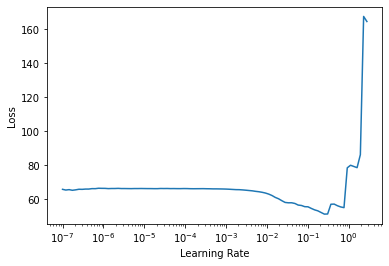

In [67]:
learn.lr_find()

In [68]:
learn.fit_one_cycle(20, 1e-3, pct_start = 0.7, div = 1)

epoch,train_loss,valid_loss,flat_l1,time
0,0.787770,1.255885,0.731566,00:33
1,0.328392,1.088681,0.637500,00:34
2,0.182157,0.894191,0.525179,00:34
3,0.118898,0.871887,0.529525,00:34
4,0.086910,0.816706,0.454417,00:33
5,0.073356,0.801474,0.445473,00:34
6,0.058027,0.806829,0.448305,00:33
7,0.051464,0.781473,0.412952,00:34
8,0.041957,0.779243,0.408358,00:33
9,0.038538,0.774280,0.408685,00:33


In [70]:
import gc
gc.collect()

1625

In [69]:
learn.show_results()

,uid,profile,anime_uid,Comedy,Sports,Drama,School,Shounen,Music,Romance,Sci-Fi,Adventure,Mystery,Fantasy,Action,Military,Magic,Supernatural,Vampire,Slice of Life,Demons,Historical,Super Power,Mecha,Parody,Samurai,Seinen,Police,Psychological,Josei,Space,Kids,Shoujo Ai,Ecchi,Shoujo,Horror,Shounen Ai,Cars,Martial Arts,Game,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri,gender,score_anime,score_anime_pred
0,85936,46590,5702,1,1,2,1,1,1,2,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,9,8.997248
1,79323,12997,2333,2,1,2,1,1,1,2,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,10,9.984763
2,26790,5757,3924,1,1,1,1,2,1,1,1,2,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,6,6.003664
3,2203,16902,193,2,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,9,8.986614
4,0,8887,0,2,1,2,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,9,7.231337
5,59198,26449,5199,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,6,5.973176
6,0,46316,0,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,9,6.007699
7,110471,14424,6370,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,8,7.997696
8,7932,27705,1033,1,1,1,1,2,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,10,9.978721


In [102]:
rating_w_users[rating_w_users.uid == 0]

,uid,profile,anime_uid,score_anime,Comedy,Sports,Drama,School,Shounen,Music,...,Martial Arts,Game,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri,gender,age


In [127]:
rating_w_users.columns

Index(['uid', 'profile', 'anime_uid', 'score_anime', 'Comedy', 'Sports',
       'Drama', 'School', 'Shounen', 'Music', 'Romance', 'Sci-Fi', 'Adventure',
       'Mystery', 'Fantasy', 'Action', 'Military', 'Magic', 'Supernatural',
       'Vampire', 'Slice of Life', 'Demons', 'Historical', 'Super Power',
       'Mecha', 'Parody', 'Samurai', 'Seinen', 'Police', 'Psychological',
       'Josei', 'Space', 'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror',
       'Shounen Ai', 'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia',
       'Harem', 'Hentai', 'Yaoi', 'Yuri', 'gender', 'age'],
      dtype='object')

In [128]:
rating_w_users.profile.unique().shape

(47885,)

In [71]:
dls = fc.CollabDataLoaders.from_df(rating_w_users, user_name = 'uid', item_name ='anime_uid', rating_name  = 'score_anime', bs = 1024, shuffle_train= True)

In [72]:
fc.get_emb_sz(dls.train_ds, {})

[(124570, 600), (7969, 245)]

In [73]:
learn = fc.collab_learner (dls, opt_func=fc.ranger, use_nn = True, layers = [512,256,127,64],metrics = flat_l1, emb_szs ={'anime_uid':32, 'gender':4, 'profile': 100})

In [74]:
learn.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(124570, 600)
    (1): Embedding(7969, 32)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(632, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=632, out_features=512, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=512, out_features=256, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=256, out_features=127, bias=False)
      (2): ReLU(inplace=True)
    )
    (3): LinBnDrop(
      (0): BatchNorm1d(127, eps=1e-05, momentum=0.1, affine=True, track_running

SuggestedLRs(lr_min=0.10964782238006592, lr_steep=0.02754228748381138)

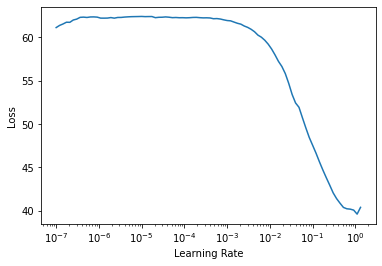

In [75]:
learn.lr_find()

In [76]:
learn.fit_one_cycle(20, 1e-2, div = 0.8, pct_start = 0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,0.611519,0.540000,0.437439,00:23
1,0.248907,0.418746,0.327619,00:23
2,0.143012,0.378322,0.227963,00:23
3,0.105427,0.336206,0.186009,00:23
4,0.079883,0.438465,0.312629,00:23
5,0.056722,0.352995,0.156401,00:23
6,0.049738,0.385667,0.195739,00:23
7,0.058764,0.384530,0.195847,00:22
8,0.047085,0.322459,0.154942,00:22
9,0.043902,0.423357,0.178239,00:22
